# ADAPTIVE BOOSTING, XG BOOST AND GRADIENT BOOSTING

The aim of this case study is to predict the loan approval or denial status of an applicant using adaptive boosting, XG boost and gradient boosting algorithms. First we load the dataset and the libraries into the code. We then carry out data exploration activities like taking a peek at the data, studying descriptive statistics, class distributions and correlation between attributes. We further explore the data and then carry out data visualization using univariate (histogram, density and box and whisker) plots and multivariate (scatter plot matrix and correlation matrix) plots. We then split the data into train and test data and then instantiate models using Adaptive boosting, XG boost and gradient boosting . Then the models are fitted and the acuracy is found out. We predict the values and plot the confusion matrix. The models give accuracies of 87%, 87% and 88 % respectively. 

In [8]:
# Load Libraries

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn import metrics
from patsy import dmatrices
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
# LOAD DATASET

In [11]:
df = pd.read_excel("Decision.xlsx")

In [12]:
df.shape

(7759, 29)

(array([ 4437.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3322.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

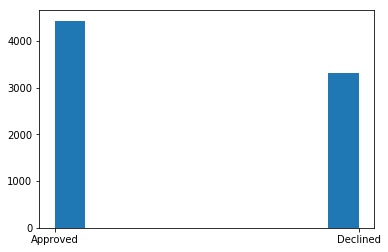

In [13]:
plt.hist(df['APPLICATION.STATUS']) # IMBALANCED DATASET

In [14]:
# DROP COLUMNS, SIMPLIFY MODEL

In [15]:
df1 = df.drop(['APPLICATION.ID','DSA.ID','DEALER.ID','CITY','STATE','ZIP.CODE','PRIMARY.ASSET.CTG','PRIMARY.ASSET.MAKE','PRIMARY.ASSET.MODELNO','QUEUE.ID','CURRENT.STAGE','QUEUE.ID','VOTER_ID','AADHAAR','DRIVING_LICENSE','BANK_PASSBOOK','PAN.STATUS','PAN'],axis =1)

# DATA EXPLORATION

In [16]:
# 1. PEEK AT DATA

In [17]:
df1.head()

,MARITAL.STATUS,GENDER,AGE,EDUCATION,RESIDENCE.TYPE,EMPLOY.CONSTITUTION,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR,OWN.HOUSE.TYPE,APPLICATION.STATUS
0,Single,Male,30,GRADUATE,OWNED-BUNGLOW,SELF-EMPLOYED,69.0,32321,28000,10,Self Owned,Declined
1,Married,Male,38,OTHERS,PARENT OWNED-HOUSE,SELF-EMPLOYED,108.0,47000,47000,12,Parent Owned,Approved
2,Married,Male,52,GRADUATE,OWNED-ROWHOUSE,SELF-EMPLOYED,143.0,30000,30000,12,Self Owned,Approved
3,Married,Male,57,GRADUATE,OWNED-BUNGLOW,SELF-EMPLOYED,60.0,32321,49000,12,Self Owned,Declined
4,Married,Male,38,GRADUATE,OWNED-BUNGLOW,SALARIED,62.0,32321,45000,10,Self Owned,Approved


In [18]:
# 2. DIMENSIONS

In [19]:
df1.shape

(7759, 12)

In [20]:
# 3. DATA TYPES

In [21]:
df1.dtypes

MARITAL.STATUS          object
GENDER                  object
AGE                      int64
EDUCATION               object
RESIDENCE.TYPE          object
EMPLOY.CONSTITUTION     object
APPLICATION.SCORE      float64
APPROVED.AMOUNT          int64
APPLIED.AMOUNT           int64
LOAN.TENOR               int64
OWN.HOUSE.TYPE          object
APPLICATION.STATUS      object
dtype: object

In [22]:
# 4. DESCRIPTIVE STATISTICS

In [23]:
df1.describe()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
count,7759.000000,7759.000000,7759.000000,7759.000000,7759.000000
mean,35.693259,46.343204,32321.418997,34211.627014,13.129656
std,9.391776,34.835119,9988.441681,18952.163116,12.682123
min,12.000000,-45.000000,7001.000000,10.000000,0.000000
25%,28.000000,13.000000,32000.000000,21000.000000,10.000000
50%,34.000000,42.000000,32321.000000,30000.000000,12.000000
75%,42.000000,73.000000,32321.000000,43870.000000,12.000000
max,67.000000,160.000000,300000.000000,800000.000000,360.000000


In [24]:
# 5. CLASS DISTRIBUTION

In [25]:
df1.groupby("MARITAL.STATUS").size()

MARITAL.STATUS
Married    6257
Single     1502
dtype: int64

(array([ 6257.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1502.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

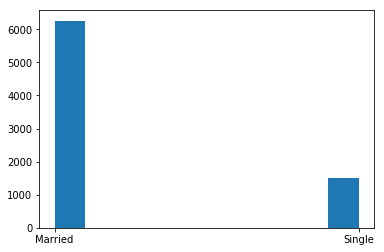

In [26]:
plt.hist(df1['MARITAL.STATUS']) 

In [27]:
df1.groupby("GENDER").size()

GENDER
Female    1270
Male      6489
dtype: int64

(array([ 1270.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6489.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

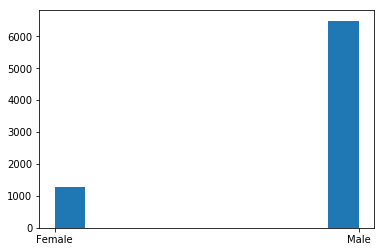

In [28]:
plt.hist(df1['GENDER']) 

In [29]:
df1.groupby("EDUCATION").size()

EDUCATION
DOCTORATE           12
GRADUATE          4257
OTHERS            1227
POST-GRADUATE      419
PROFESSIONAL        32
UNDER GRADUATE    1812
dtype: int64

In [30]:
df1.groupby("RESIDENCE.TYPE").size()

RESIDENCE.TYPE
COMPANY PROVIDED-FLAT             33
COMPANY PROVIDED-HOUSE            49
OWNED-BUNGLOW                   1006
OWNED-CHAWL                      284
OWNED-FLAT                      1154
OWNED-PENTHOUSE                  669
OWNED-ROWHOUSE                  1064
PARENT OWNED-FLAT                 83
PARENT OWNED-HOUSE              1301
RENTED-BACHELOR ACCOMODATION       1
RENTED-BUNGLOW                   288
RENTED-CHAWL                     147
RENTED-FLAT                      770
RENTED-PENTHOUSE                 307
RENTED-ROWHOUSE                  603
dtype: int64

In [31]:
df1.groupby("EMPLOY.CONSTITUTION").size()

EMPLOY.CONSTITUTION
PARTNERSHIP                  17
PRIVATE LIMITED COMPANY      21
SALARIED                   3409
SELF-EMPLOYED              4305
TRUST                         7
dtype: int64

(array([   17.,     0.,    21.,     0.,     0.,  3409.,     0.,  4305.,
            0.,     7.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

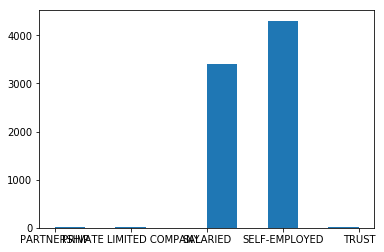

In [32]:
plt.hist(df1['EMPLOY.CONSTITUTION']) 

In [33]:
df1.groupby("OWN.HOUSE.TYPE").size()

OWN.HOUSE.TYPE
Children Owned      11
Parent Owned      1815
Self Owned        5699
Spouse Owned       234
dtype: int64

(array([   11.,     0.,     0.,  1815.,     0.,     0.,  5699.,     0.,
            0.,   234.]),
 array([ 0. ,  0.3,  0.6,  0.9,  1.2,  1.5,  1.8,  2.1,  2.4,  2.7,  3. ]),
 <a list of 10 Patch objects>)

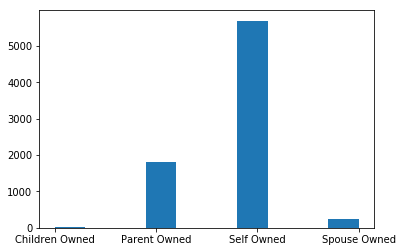

In [34]:
plt.hist(df1['OWN.HOUSE.TYPE']) 

In [35]:
df1.groupby("APPLICATION.STATUS").size()

APPLICATION.STATUS
Approved    4437
Declined    3322
dtype: int64

(array([ 4437.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3322.]),
 array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <a list of 10 Patch objects>)

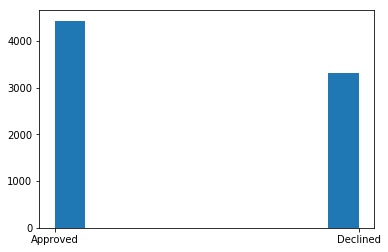

In [36]:
plt.hist(df1['APPLICATION.STATUS']) 

In [37]:
# 6. CORRELATION BETWEEN ATTRIBUTES

In [38]:
df1.corr(method = "pearson")

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
AGE,1.000000,0.167945,0.057474,0.069959,0.005535
APPLICATION.SCORE,0.167945,1.000000,0.110576,0.089620,-0.018497
APPROVED.AMOUNT,0.057474,0.110576,1.000000,0.500006,0.003750
APPLIED.AMOUNT,0.069959,0.089620,0.500006,1.000000,0.027844
LOAN.TENOR,0.005535,-0.018497,0.003750,0.027844,1.000000


In [39]:
# 7. SKEW OF UNIVARIATE DISTRIBUTIONS

In [40]:
df1.skew()

AGE                   0.650237
APPLICATION.SCORE     0.575013
APPROVED.AMOUNT       3.851160
APPLIED.AMOUNT        9.620533
LOAN.TENOR           12.925869
dtype: float64

In [41]:
# 8. DATA INFERENCES

In [42]:
df1.groupby('MARITAL.STATUS').mean()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
MARITAL.STATUS,,,,,
Married,37.474668,47.460112,32387.631613,34108.442225,13.075276
Single,28.272304,41.690413,32045.591877,34641.472037,13.356192


In [43]:
df1.groupby('GENDER').mean()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
GENDER,,,,,
Female,36.431496,39.007811,32831.613386,34602.300787,12.933858
Male,35.548775,47.778857,32221.565881,34135.165973,13.167977


In [44]:
df1.groupby('EDUCATION').mean()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
EDUCATION,,,,,
DOCTORATE,38.583333,73.500000,33395.583333,33541.666667,11.666667
GRADUATE,35.258398,48.612873,32653.842612,34957.091144,13.420014
OTHERS,36.825591,42.520782,32359.407498,34532.198859,12.829666
POST-GRADUATE,34.565632,55.966587,35165.498807,39982.439141,12.439141
PROFESSIONAL,34.437500,50.125000,32604.656250,37182.812500,12.062500
UNDER GRADUATE,36.211921,41.127439,30844.949779,30860.748896,12.838852


In [45]:
df1.groupby('RESIDENCE.TYPE').mean()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
RESIDENCE.TYPE,,,,,
COMPANY PROVIDED-FLAT,37.424242,55.393939,35088.333333,32745.454545,15.727273
COMPANY PROVIDED-HOUSE,38.836735,51.040816,30148.102041,31878.979592,12.122449
OWNED-BUNGLOW,37.614314,49.539761,32604.331014,34838.189861,12.599404
OWNED-CHAWL,37.147887,44.563380,32141.373239,33585.161972,13.802817
OWNED-FLAT,37.905546,50.550191,33177.713172,36079.185442,12.448873
OWNED-PENTHOUSE,36.748879,45.766816,32454.817638,33805.103139,12.433483
OWNED-ROWHOUSE,37.060150,51.220865,32790.221805,35461.720865,15.100564
PARENT OWNED-FLAT,31.686747,43.831325,30820.963855,29949.421687,12.036145
PARENT OWNED-HOUSE,32.078401,41.915450,30376.003075,30094.348962,13.222137


In [46]:
df1.groupby('EMPLOY.CONSTITUTION').mean()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
EMPLOY.CONSTITUTION,,,,,
PARTNERSHIP,30.882353,43.176471,32461.882353,39623.529412,34.588235
PRIVATE LIMITED COMPANY,31.666667,52.000000,30880.666667,25233.333333,11.047619
SALARIED,34.661778,47.590789,32069.592842,33610.065122,13.054561
SELF-EMPLOYED,36.556098,45.350969,32518.313357,34707.967944,13.118931
TRUST,31.142857,39.714286,37851.857143,35714.285714,10.428571


In [47]:
df1.groupby('OWN.HOUSE.TYPE').mean()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
OWN.HOUSE.TYPE,,,,,
Children Owned,49.909091,33.727273,33847.818182,33217.272727,12.727273
Parent Owned,32.026997,41.839118,31236.782369,32629.347107,13.373003
Self Owned,36.632041,47.936992,32637.269521,34700.221091,12.981576
Spouse Owned,40.598291,43.055556,32970.106838,34631.619658,14.867521


In [48]:
df1.groupby('APPLICATION.STATUS').mean()

,AGE,APPLICATION.SCORE,APPROVED.AMOUNT,APPLIED.AMOUNT,LOAN.TENOR
APPLICATION.STATUS,,,,,
Approved,35.743971,51.408835,32323.229660,33653.387199,13.228984
Declined,35.625527,39.577339,32319.000602,34957.235099,12.996990


# DATA VISUALIZATION

In [49]:
# 1. UNIVARIATE PLOTS

In [50]:
# 1.1. HISTOGRAMS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbd6d1a2e8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdbd6dceeb8>]], dtype=object)

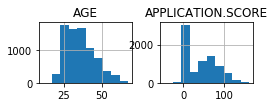

In [51]:
df1[['AGE','APPLICATION.SCORE']].hist(layout = (3,3), sharex = False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbd709d438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdbd6b75160>]], dtype=object)

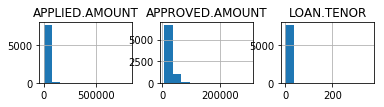

In [52]:
df1[['APPROVED.AMOUNT','APPLIED.AMOUNT','LOAN.TENOR']].hist(layout = (3,3), sharex = False)

In [53]:
# 1.2. DENSITY PLOTS

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbd6b5a0f0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdbcf800a58>]], dtype=object)

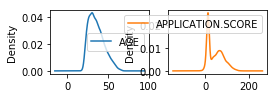

In [54]:
df1[['AGE','APPLICATION.SCORE']].plot(kind='density', subplots=True, layout=(3,3), sharex=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbcf8103c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdbcedcf668>]], dtype=object)

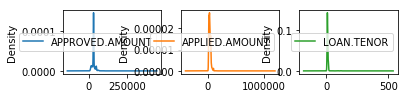

In [55]:
df1[['APPROVED.AMOUNT','APPLIED.AMOUNT','LOAN.TENOR']].plot(kind='density', subplots=True, layout=(3,3), sharex=False)

In [56]:
# 1.3 BOX AND WHISKER PLOTS

AGE                     AxesSubplot(0.125,0.125;0.352273x0.755)
APPLICATION.SCORE    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

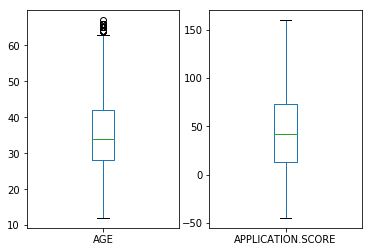

In [57]:
df1[['AGE','APPLICATION.SCORE']].plot(kind='box', subplots=True, sharex=False, sharey=False)

APPROVED.AMOUNT       AxesSubplot(0.125,0.125;0.227941x0.755)
APPLIED.AMOUNT     AxesSubplot(0.398529,0.125;0.227941x0.755)
LOAN.TENOR         AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

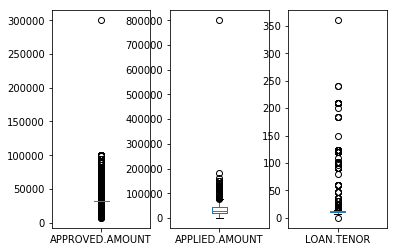

In [58]:
df1[['APPROVED.AMOUNT','APPLIED.AMOUNT','LOAN.TENOR']].plot(kind='box', subplots=True, sharex=False, sharey=False)

In [66]:
# 2. MULTIVARIATE PLOTS

In [67]:
# 2.1 CORRELATION MATRIX PLOT

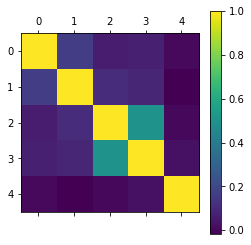

In [68]:
correlations = df1.corr()
plt.matshow(correlations)
plt.colorbar()
names = ['AGE', 'APPLICATION.SCORE','APPROVED.AMOUNT','APPLIED.AMOUNT','LOAN.TENOR']

In [69]:
# 2.2 SCATTER PLOT MATRIX

In [70]:
from pandas.tools.plotting import scatter_matrix

/opt/usr/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbce43f630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdbcdf14c50>]], dtype=object)

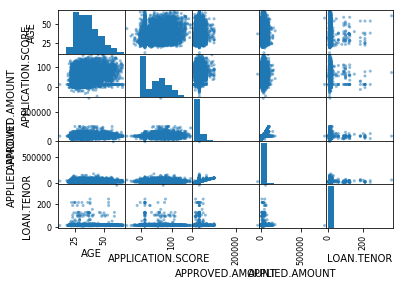

In [71]:
scatter_matrix(df1)

In [72]:
# STACKED BAR PLOT

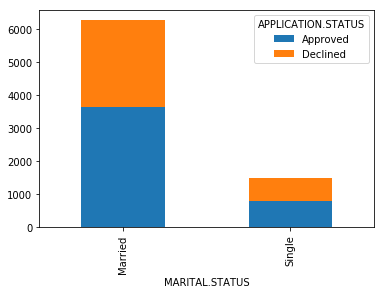

In [73]:
ct1 = pd.crosstab(df1['MARITAL.STATUS'],df1['APPLICATION.STATUS'])
ct1.plot.bar(stacked=True)

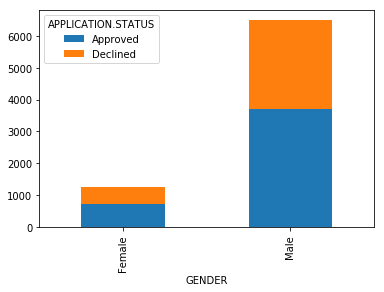

In [74]:
ct2 = pd.crosstab(df1['GENDER'],df1['APPLICATION.STATUS'])
ct2.plot.bar(stacked=True)

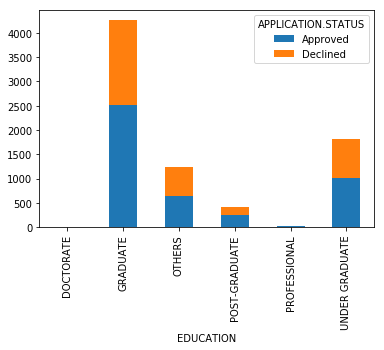

In [75]:
ct2 = pd.crosstab(df1['EDUCATION'],df1['APPLICATION.STATUS'])
ct2.plot.bar(stacked=True)

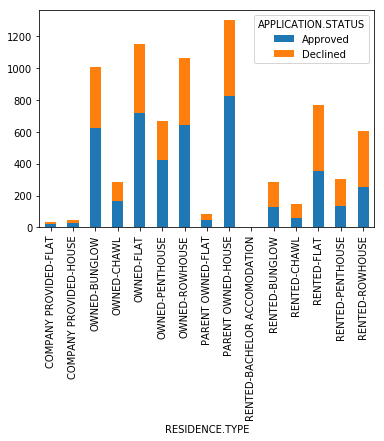

In [76]:
ct2 = pd.crosstab(df1['RESIDENCE.TYPE'],df1['APPLICATION.STATUS'])
ct2.plot.bar(stacked=True)

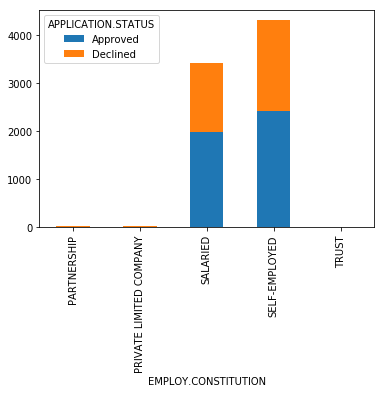

In [77]:
ct2 = pd.crosstab(df1['EMPLOY.CONSTITUTION'],df1['APPLICATION.STATUS'])
ct2.plot.bar(stacked=True)

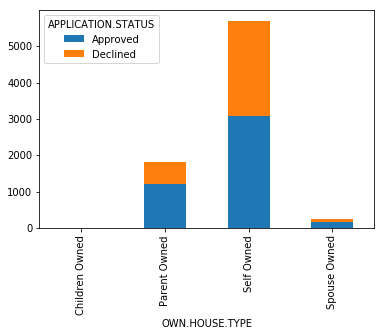

In [78]:
ct2 = pd.crosstab(df1['OWN.HOUSE.TYPE'],df1['APPLICATION.STATUS'])
ct2.plot.bar(stacked=True)

In [79]:
# RENAME COLUMNS

In [80]:
df2 = df1.rename(columns = {'APPLICATION.STATUS':'APPLICATION','MARITAL.STATUS':'MA','GENDER':'GE','EDUCATION':'ED','RESIDENCE.TYPE':'RE','EMPLOY.CONSTITUTION':'EM','APPLICATION.SCORE':'AS','APPROVED.AMOUNT':'AA','APPLIED.AMOUNT':'APA','LOAN.TENOR':'LO','OWN.HOUSE.TYPE':'OW'})

In [81]:
Y, X = dmatrices('APPLICATION ~ MA + GE + ED + RE + EM + AS + AA + APA + LO + OW + AGE', df2, return_type="dataframe")

In [82]:
Y = Y.rename(columns = {'APPLICATION[Approved]':'APPL'})

In [83]:
# TRAIN TEST SPLIT

In [84]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y['APPL'],test_size = 0.2,random_state = 0)

In [92]:
# ADAPTIVE BOOSTING, XG BOOST AND GRADIENT BOOSTING

In [86]:
# INSTANTIATE MODELS

In [87]:
from sklearn.ensemble import AdaBoostClassifier
model1 = AdaBoostClassifier()

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
model2 = GradientBoostingClassifier()

In [99]:
from xgboost import XGBClassifier
model3  = XGBClassifier()

In [94]:
# FIT THE DATA

In [95]:
model1.fit(X_train,Y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [96]:
model2.fit(X_train,Y_train) # NUMBER OF TREES = 10

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [136]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
X_train.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_train.columns.values]
X_test.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X_test.columns.values]
X.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in X.columns.values]

In [108]:
model3.fit(X_train,Y_train, verbose = False)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [191]:
# CALCULATE MODEL SCORES

In [109]:
model1.score(X_test,Y_test)

0.86920103092783507

In [110]:
model2.score(X_test,Y_test)

0.87564432989690721

In [113]:
model3.score(X_test,Y_test)

0.87306701030927836

In [194]:
# CONFUSION MATRIX METRICS

In [114]:
predicted1 = model1.predict(X_test)

In [115]:
predicted2 = model2.predict(X_test)

In [116]:
predicted3 = model3.predict(X_test)

In [117]:
print(metrics.confusion_matrix(Y_test, predicted1))
print (metrics.classification_report(Y_test, predicted1))

[[661  20]
 [183 688]]
             precision    recall  f1-score   support

        0.0       0.78      0.97      0.87       681
        1.0       0.97      0.79      0.87       871

avg / total       0.89      0.87      0.87      1552



In [118]:
print(metrics.confusion_matrix(Y_test, predicted2))
print (metrics.classification_report(Y_test, predicted2))

[[658  23]
 [170 701]]
             precision    recall  f1-score   support

        0.0       0.79      0.97      0.87       681
        1.0       0.97      0.80      0.88       871

avg / total       0.89      0.88      0.88      1552



In [130]:
print(metrics.confusion_matrix(Y_test, predicted3))
print (metrics.classification_report(Y_test, predicted3))

[[668  13]
 [184 687]]
             precision    recall  f1-score   support

        0.0       0.78      0.98      0.87       681
        1.0       0.98      0.79      0.87       871

avg / total       0.89      0.87      0.87      1552



In [199]:
# CONFUSION MATRIX

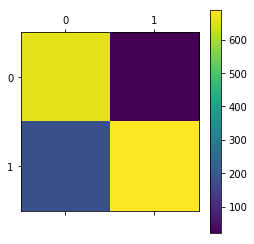

In [120]:
cm = confusion_matrix(Y_test, predicted1)
plt.matshow(cm)
plt.colorbar()

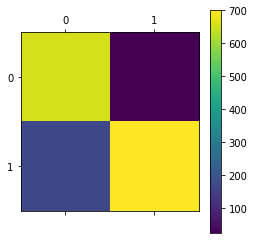

In [121]:
cm = confusion_matrix(Y_test, predicted2)
plt.matshow(cm)
plt.colorbar()

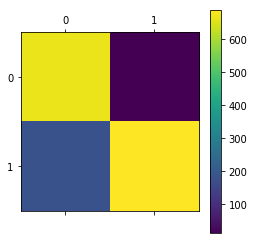

In [122]:
cm = confusion_matrix(Y_test, predicted3)
plt.matshow(cm)
plt.colorbar()

In [229]:
# FEATURE IMPORTANCES

In [123]:
from sklearn.ensemble import ExtraTreesClassifier

In [124]:
model = ExtraTreesClassifier()

In [125]:
model.fit(X_train,Y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [126]:
print(model.feature_importances_)

[  0.00000000e+00   1.55555386e-02   2.00380663e-02   1.14800935e-02
   8.70880648e-03   6.03607400e-03   1.30191974e-03   1.09959199e-02
   1.76152895e-03   7.26631168e-03   4.83753835e-03   7.68390822e-03
   6.67995592e-03   7.50301863e-03   3.11024096e-03   6.45911872e-03
   4.13977555e-05   3.49986979e-03   2.73280659e-03   5.37447238e-03
   3.47862920e-03   7.41885280e-03   1.24246745e-03   1.00327227e-02
   1.10582058e-02   2.86272014e-04   5.93131705e-03   8.52956712e-03
   2.35008641e-03   1.47518509e-01   3.18806159e-01   1.42867670e-01
   6.99255543e-02   1.39487402e-01]


In [127]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(model1, X, Y['APPL'], cv=kfold)


In [128]:
results1.mean()

0.8584915197871632

In [129]:
results1.std()

0.043199380818263196

In [131]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results2 = cross_val_score(model2, X, Y['APPL'], cv=kfold)

In [132]:
results2.mean()

0.86519371466577988

In [134]:
results2.std()

0.041818309664144959

In [137]:
# Evaluate using Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
results3 = cross_val_score(model3, X, Y['APPL'], cv=kfold)

In [138]:
results3.mean()

0.86429248420352511

In [139]:
results3.std()

0.044442381877137151